# Business Understanding

## Project Domain

Transportation Safety Analytics
Domain proyek ini berada di bidang Transportation Safety Analytics, yang berfokus pada analisis data untuk memahami faktor-faktor yang memengaruhi keselamatan penumpang dalam sistem transportasi. Dalam konteks ini, proyek meneliti peristiwa tenggelamnya kapal Titanic — salah satu bencana maritim paling terkenal — untuk mengidentifikasi pola-pola keselamatan berdasarkan karakteristik penumpang seperti usia, jenis kelamin, kelas sosial, dan lainnya.

Tujuan dari domain ini adalah untuk mengevaluasi dan meningkatkan keselamatan dalam transportasi publik melalui wawasan data historis, yang pada akhirnya dapat diterapkan untuk mendukung pengambilan keputusan di masa darurat, perancangan prosedur evakuasi, serta kebijakan prioritas penyelamatan yang lebih inklusif dan adil.



## Problem Statements

Mengembangkan model prediksi yang mampu menentukan kemungkinan seorang penumpang selamat dari tenggelamnya kapal Titanic berdasarkan atribut yang tersedia dalam data (seperti umur, jenis kelamin, kelas kabin, dll).

## Goals

Dalam tragedi tenggelamnya kapal Titanic, tidak semua penumpang memiliki peluang yang sama untuk selamat. Pihak penyelamat perlu mengambil keputusan cepat dalam keadaan darurat. Namun, apakah karakteristik seperti jenis kelamin, usia, atau kelas sosial mempengaruhi kemungkinan seseorang untuk selamat?

## Solution Statements

Mengembangkan model prediksi yang mampu menentukan kemungkinan seorang penumpang selamat dari tenggelamnya kapal Titanic berdasarkan atribut yang tersedia dalam data (seperti umur, jenis kelamin, kelas kabin, dll).

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jasminemumtaz04","key":"75a3c7d12a23172ca42a78dc4f9f9e0e"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle competitions download -c titanic --force


  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 163MB/s]


In [4]:
!mkdir titanic
!unzip titanic.zip -d titanic
!ls titanic

Archive:  titanic.zip
  inflating: titanic/gender_submission.csv  
  inflating: titanic/test.csv        
  inflating: titanic/train.csv       
gender_submission.csv  test.csv  train.csv


## Import Library yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import joblib
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Exploratory Data Analysis

**Membaca train.csv**

In [6]:
df = pd.read_csv('titanic/train.csv')

In [7]:
train_data = pd.read_csv('titanic/train.csv')

**Informasi tentang data set**

In [8]:
# Lihat 5 baris pertama
df.head()

# Informasi umum tentang dataset
df.info()

# Statistik deskriptif
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Visualisasi Nilai yang Hilang**

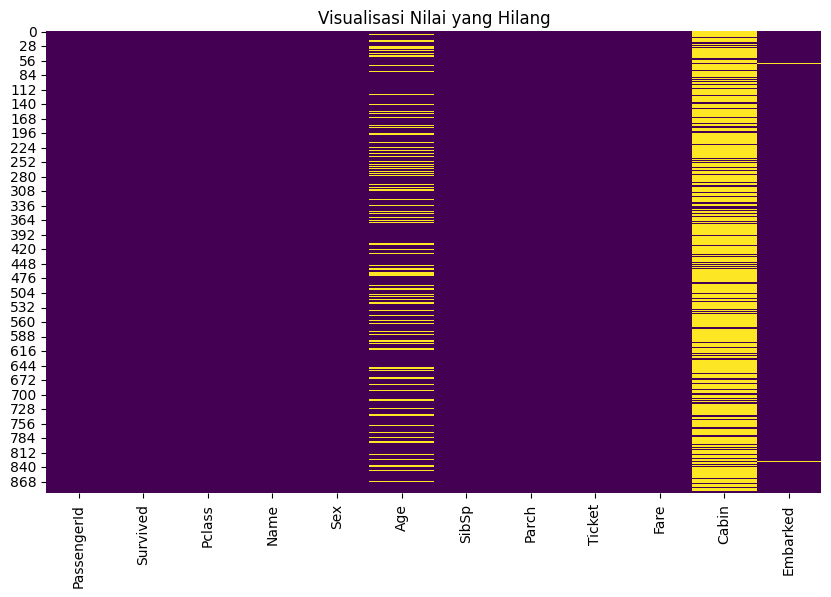

In [9]:
# Jumlah nilai yang hilang per kolom
df.isnull().sum()

# Visualisasi nilai yang hilang
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualisasi Nilai yang Hilang')
plt.show()


**Visualisasi Tarif vs Kelangsungan Hidup**

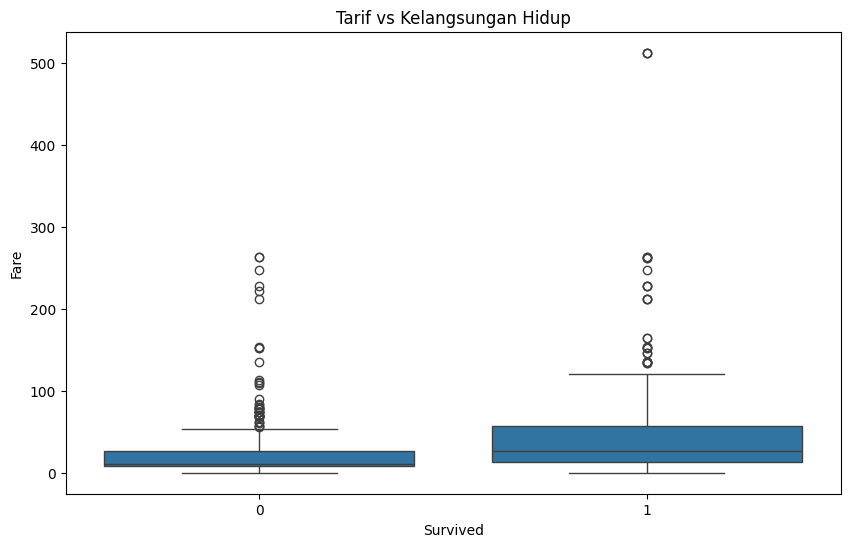

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Tarif vs Kelangsungan Hidup')
plt.show()

**Visualisasi Kelangsungan Hidup bedasarkan jenis kelamin**

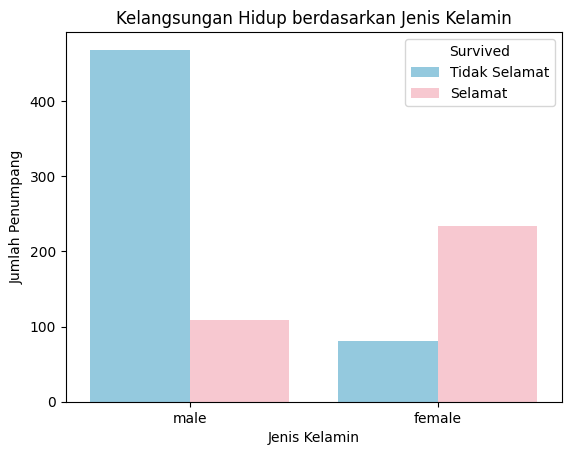

In [11]:
sns.countplot(x='Sex', hue='Survived', data=df, palette={0: 'skyblue', 1: 'pink'})
plt.title('Kelangsungan Hidup berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')
plt.legend(title='Survived', labels=['Tidak Selamat', 'Selamat'])
plt.show()

**Visualisasi Kelangsungan Hidup bedasarkan Kelas Penumpang**

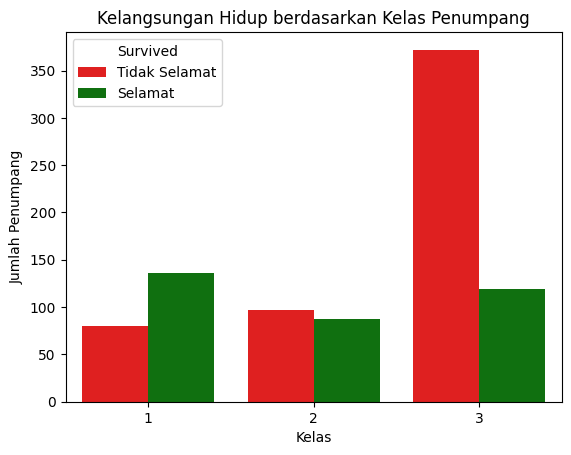

In [12]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette={0: 'red', 1: 'green'})
plt.title('Kelangsungan Hidup berdasarkan Kelas Penumpang')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Penumpang')
plt.legend(title='Survived', labels=['Tidak Selamat', 'Selamat'])
plt.show()

**Visualisasi Distribusi Usia Penumpang**

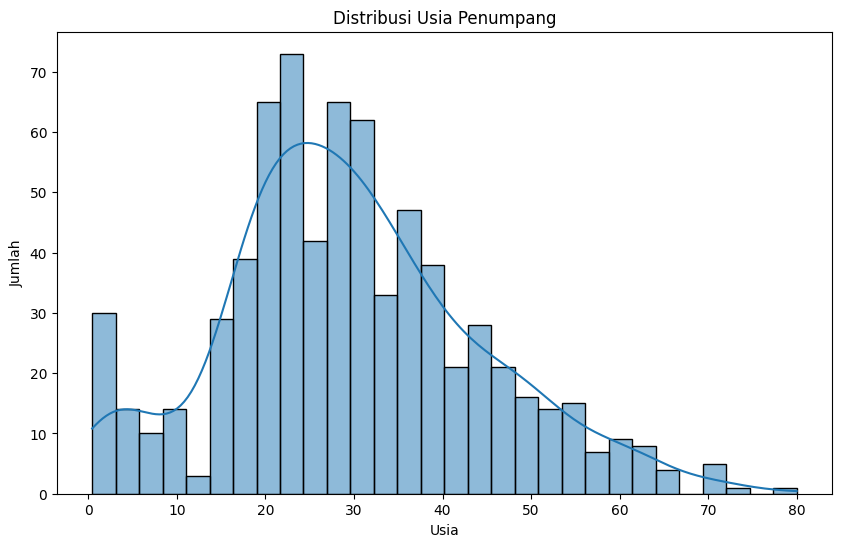

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribusi Usia Penumpang')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

**Visualisasi Fitur Numerik**

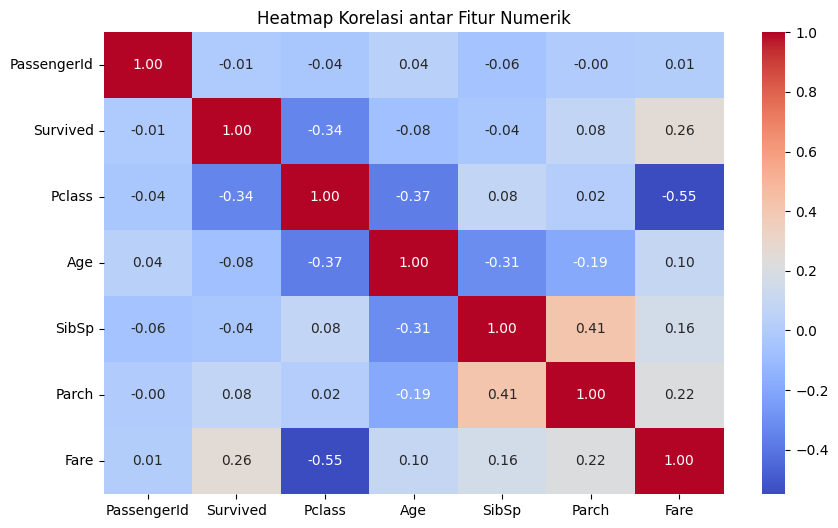

In [14]:
plt.figure(figsize=(10,6))

# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Fitur Numerik')
plt.show()

# Data Preparation

**Melihat Kolom yang tersedia**

In [15]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


**Mengisi nilai yang hilang (missing values / NaN)**

In [16]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

**Mengisi nilai kosong (NaN) di kolom Embarked**

In [17]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

**Label encoding dan One-Hot encoding**

In [18]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

**Feature engineering**

In [19]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

**Menghapus data yang tidak di perlukan**

In [20]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

**Feature scaling**

In [21]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [22]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(df.isnull().sum())  # Pastikan semua missing values sudah ditangani
print(X_train.shape, X_test.shape)

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
FamilySize    0
IsAlone       0
dtype: int64
(712, 10) (179, 10)


**Memastikan kembali Visualisasi Nilai yang Hilang**

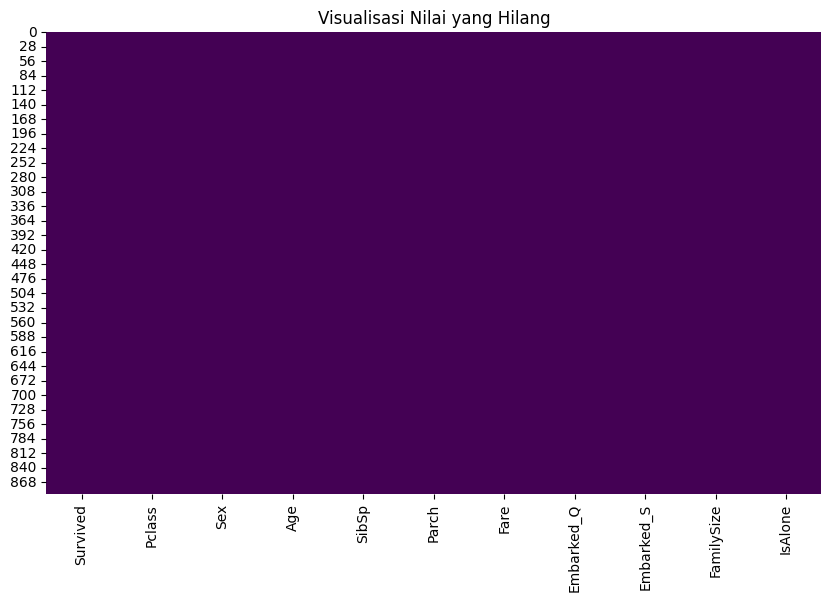

In [25]:
# Jumlah nilai yang hilang per kolom
df.isnull().sum()

# Visualisasi nilai yang hilang
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualisasi Nilai yang Hilang')
plt.show()


# Modeling

**Membuat Model ANN dengan klasifikasi biner**

In [45]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Optional, helps prevent overfitting
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer untuk binary classification

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6157 - loss: 0.6697 - val_accuracy: 0.6983 - val_loss: 0.5782
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6899 - loss: 0.5800 - val_accuracy: 0.7542 - val_loss: 0.5307
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7623 - loss: 0.5362 - val_accuracy: 0.7933 - val_loss: 0.4994
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7739 - loss: 0.5207 - val_accuracy: 0.8101 - val_loss: 0.4676
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7568 - loss: 0.5099 - val_accuracy: 0.8156 - val_loss: 0.4437
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7420 - loss: 0.5105 - val_accuracy: 0.8212 - val_loss: 0.4285
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7967 - loss: 0.4874 - val_accuracy: 0.8212 - val_loss: 0.4177
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8022 - loss: 0.4812 - val_accuracy: 0.7989 - v

# Evaluation

**Evaluasi Akurasi Model**

In [48]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8221 - loss: 0.4147 
Test Accuracy: 81.56%


**Visualisasi Confusion Matrix**

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


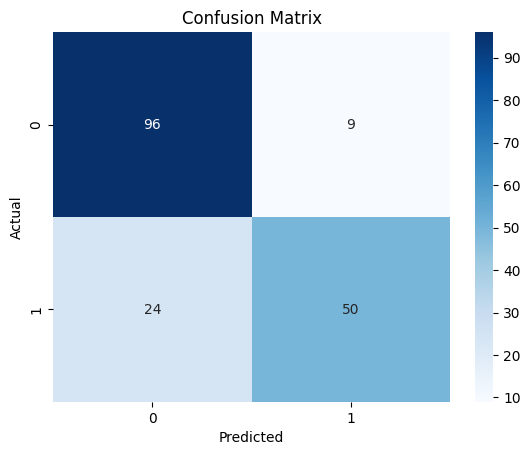

In [49]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [50]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       105
           1       0.85      0.68      0.75        74

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



# Deployment

## Model Simulation

**Simulasi Input Data Manual**

In [51]:
input_data = np.array([[3, 0, 22, 1, 0, 7.25, 1, 0, 2, 0]])

In [52]:
input_data[:, [2, 5]] = scaler.transform(input_data[:, [2, 5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
input_data = input_data.astype('float32')

**Load Model tf Lite**

In [54]:
interpreter = tf.lite.Interpreter(model_path="titanic_model.tflite")
interpreter.allocate_tensors()

In [55]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [56]:
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

In [57]:
prediction = interpreter.get_tensor(output_details[0]['index'])

**Hasil Prediksi**

In [58]:
print("Predicted:", prediction)
print("Survived" if prediction[0][0] >= 0.5 else "Did not survive")

Predicted: [[0.09604811]]
Did not survive


## Save Model

**Save Scaler.pkl**

In [59]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

**Save model ke format keras .h5 terlebih dahulu**

In [60]:
model.save('titanic_ann_model.h5')

**Konversi dari Format keras h.5 ke tf.lite**

In [61]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmp6w7n07u0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10), dtype=tf.float32, name='keras_tensor_11')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134292760677072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134292760683024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134292760689552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134292760679760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134292760685520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134292760683984: TensorSpec(shape=(), dtype=tf.resource, name=None)


**Simpan model TFLite ke file**

In [62]:
with open('titanic_model.tflite', 'wb') as f:
    f.write(tflite_model)